<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<img src="mioti.png" style="height: 80px">

<center style="color:#888">Data Science with Python</center>

# DSPy5 Pandas "advanced". Challenge Solutions.

<img src="madrid_atasco.jpg" style="width:800px">

**Inicialización**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 9)

Vamos a trabajar con el dataset del número de accidentes de tráfico en Madrid durante el 2019 (fuente: [https://datos.madrid.es/](https://datos.madrid.es/)). Fichero explicativo: `Estructura_DS_Accidentes_trafico_desde_2019.pdf`

In [2]:
df=pd.read_excel('2019_Accidentalidad.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51806 entries, 0 to 51805
Data columns (total 14 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Nº  EXPEDIENTE                                                                           51806 non-null  object 
 1   FECHA                                                                                    51806 non-null  object 
 2   HORA                                                                                     51806 non-null  object 
 3   CALLE                                                                                    51806 non-null  object 
 4   NÚMERO                                                                                   51802 non-null  object 
 5   DISTRITO                                                    

In [4]:
df.head()

,Nº EXPEDIENTE,FECHA,HORA,CALLE,NÚMERO,DISTRITO,TIPO ACCIDENTE,ESTADO METEREOLÓGICO,TIPO VEHÍCULO,TIPO PERSONA,RANGO EDAD,SEXO,LESIVIDAD*,* La correspondencia de los códigos se encuentra descrito en la estructura del fichero.
0,2019S000020,01/01/2019,23:30:00,CALL. FUENCARRAL,149,CHAMBERÍ,Caída,Despejado,Ciclomotor,Conductor,DE 25 A 29 AÑOS,Hombre,1.0,NaN
1,2019S000017,01/01/2019,22:15:00,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Mujer,14.0,NaN
2,2019S000017,01/01/2019,22:15:00,CALL. OCA / CALL. PINZON,-,CARABANCHEL,Colisión fronto-lateral,Despejado,Ciclomotor,Conductor,DE 35 A 39 AÑOS,Hombre,3.0,NaN
3,2019S001812,01/01/2019,21:40:00,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 40 A 44 AÑOS,Hombre,14.0,NaN
4,2019S001812,01/01/2019,21:40:00,CALL. BAILEN / CUSTA. SAN VICENTE,-,CENTRO,Colisión fronto-lateral,Despejado,Turismo,Conductor,DE 30 A 34 AÑOS,Mujer,7.0,NaN


**Ejercicio 1:** ¿Quién está implicado en más accidentes de tráfico, los hombres o las mujeres? ¿Y en función del rango de edad? ¿Hay alguna franja de edad en la que las mujeres esten implicadas en más accidentes que los hombres?

In [5]:
print("El sexo con más accidentes es : ", df.groupby(by='SEXO').size().idxmax(), " con ",df.groupby(by='SEXO').size().max(), ' accidentes' )

El sexo con más accidentes es :  Hombre  con  31466  accidentes


In [6]:
print("El rango de edad con más accidentes es : ", df.groupby(by='RANGO EDAD').size().idxmax(), " con ",df.groupby(by='RANGO EDAD').size().max(), " accidentes ")

El rango de edad con más accidentes es :  DE 40 A 44 AÑOS  con  5736  accidentes 


In [39]:
#SOL1
df_temp=df.groupby(by=(['RANGO EDAD', 'SEXO'])).size().reset_index()

table = pd.pivot_table(df_temp, values=0, index=['RANGO EDAD'],
                     columns=['SEXO'])
table[(table['Mujer']>table['Hombre'])].index[0]

'DE 10 A 14 AÑOS'

In [38]:
#SOL 2
table = pd.pivot_table(df, values='Nº  EXPEDIENTE', index=['RANGO EDAD'],
                     columns=['SEXO'],aggfunc='count')

table[(table['Mujer']>table['Hombre'])].index[0]

'DE 10 A 14 AÑOS'

**Ejercicio 2:** Para el rango de edad para el cual hemos obtenido que hay más accidentes de tráfico con mujeres implicadas que con hombres, ¿esas mujeres eran conductoras, peatones o pasajeras? Para los casos en los que era conductora, ¿había alguna saltándose la ley y conduciendo un vehículo para el que necesitas carnet?

In [44]:
df_temp_2=df[(df['RANGO EDAD']=='DE 10 A 14 AÑOS') & (df['SEXO']=='Mujer')]
df_temp_2.groupby(by=(['TIPO PERSONA'])).size()


TIPO PERSONA
Conductor      8
Pasajero     214
Peatón        29
dtype: int64

In [46]:
aa=df[(df['RANGO EDAD']=='DE 10 A 14 AÑOS') & (df['SEXO']=='Mujer')]
aa['TIPO PERSONA'].value_counts()
#get_group('DE 10 A 14 AÑOS').groupby(by='TIPO PERSONA').size()

Pasajero     214
Peatón        29
Conductor      8
Name: TIPO PERSONA, dtype: int64

In [9]:
df_temp_2.groupby(by=(['TIPO PERSONA','TIPO VEHÍCULO'])).size()

TIPO PERSONA  TIPO VEHÍCULO            
Conductor     Bicicleta                      6
              Otros vehículos con motor      1
              Sin especificar                1
Pasajero      Autobús                        2
              Autobús articulado             1
              Bicicleta                      1
              Camión rígido                  2
              Furgoneta                      8
              Motocicleta > 125cc            4
              Motocicleta hasta 125cc        3
              Otros vehículos con motor      2
              Turismo                      191
Peatón        Autobús                        1
              Bicicleta                      1
              Camión rígido                  1
              Ciclomotor                     1
              Furgoneta                      2
              Motocicleta > 125cc            1
              Motocicleta hasta 125cc        3
              Sin especificar                1
              Turism

**Ejercicio 3:** ¿Cuál fue el día del año en el que hubo más accidentes? Haz un plot del nº de accidentes por mes del año ¿Es el número de accidentes constante a lo largo de los meses de 2019?. _Hint: mismo Nº EXPEDIENTE implica que se trata del mismo accidente donde hay varios implicados y por lo tanto solo hay que contarlo una vez.

In [75]:
df_temp_3=df.copy()
df_temp_3 = df_temp_3.drop_duplicates('Nº  EXPEDIENTE',keep='first')
print("El dia con más accidentes del año es : ", df_temp_3.groupby(by='FECHA').size().idxmax(), " con ",df_temp_3.groupby(by='FECHA').size().max(), " accidentes ")

El dia con más accidentes del año es :  05/04/2019  con  120  accidentes 


<AxesSubplot:xlabel='MES'>

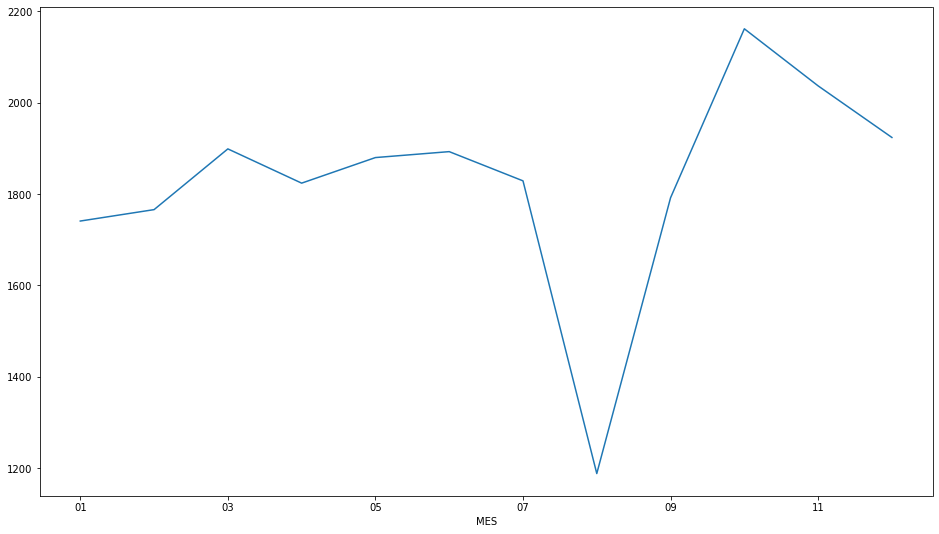

In [121]:
df_temp_3['MES']=df_temp_3['FECHA'].str[3:5]
df_temp_3.groupby(by='MES').size().plot()


<AxesSubplot:xlabel='FECHA'>

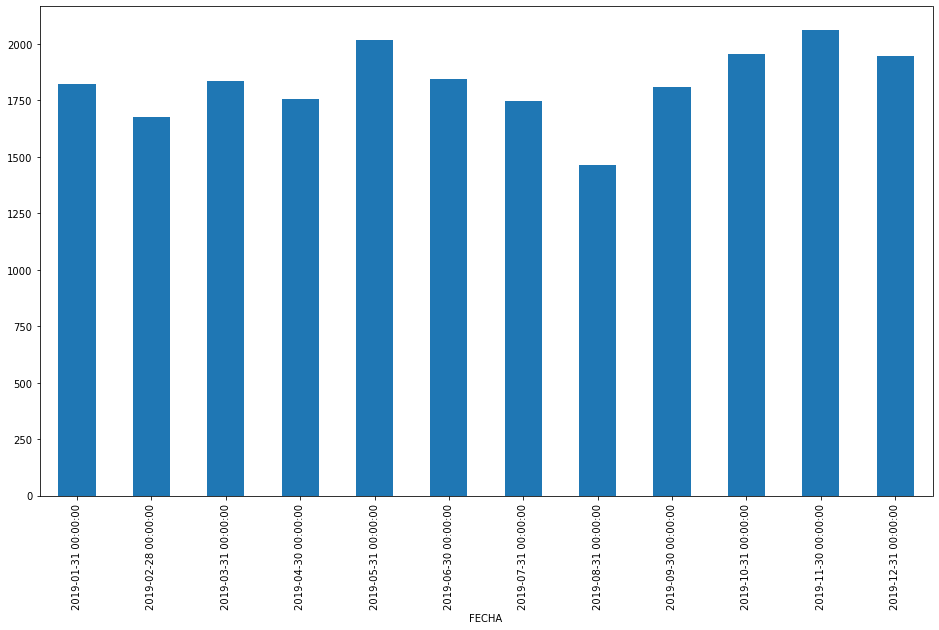

In [62]:
#SOL2 - EN ESTA CLASE NO VALE
df_temp_3.FECHA = pd.to_datetime(df_temp_3.FECHA)
#df_temp_3.info()
df_temp_3.index = df_temp_3.FECHA
df_temp_3.resample('M')['Nº  EXPEDIENTE'].count().plot.bar()


**Ejercicio 4:** ¿Cuál fue el distrito con más accidentes? ¿y la calle? _Hint: de nuevo recordar que estamos hablando de nº de accidentes y el campo Nº EXPEDIENTE puede aparecer tantas veces como personas haya habido involucradas en el accidente.

In [78]:
df_temp_4=df.copy()
df_temp_4 = df_temp_4.drop_duplicates('Nº  EXPEDIENTE',keep='first')
df_temp_4.groupby(by='DISTRITO')
print("El distrito con más accidentes del año es : ", df_temp_4.groupby(by='DISTRITO').size().idxmax(), " con ",df_temp_4.groupby(by='DISTRITO').size().max(), " accidentes ")

El distrito con más accidentes del año es :  SALAMANCA  con  1736  accidentes 


In [102]:
print("El distrito con más accidentes del año es : ", df_temp_4.groupby(by=['CALLE']).size().idxmax(), " con ",df_temp_4.groupby(by=['CALLE']).size().max(), " accidentes ")

El distrito con más accidentes del año es :  PASEO. CASTELLANA  con  309  accidentes 


**Ejercicio 5:** De las 7 calles con más accidentes del apartado anterior, genera una columna con la longitud de esa calle en metros o km (mismamente buscando en wikipedia) y obten el nº de accidentes por longitud de la calle. Una vez hecho esto podemos ver cual es la calle más propensa a tener accidentes de las 7 seleccionadas.

In [116]:
df_temp_5=df_temp_4['CALLE'].value_counts(dropna=False).head(7)
#df_temp_5.reset_index()
df_temp_5=pd.DataFrame({'Accidentes':df_temp_5.values,
                       'Longitud':[6300,10500,4000,2500,1910,4200,11500]},
                       index=df_temp_5.index
                      )
# df_temp_5.loc[:,'Longitud']=6#[6300,10500,4000,2500,1910,4200,11500]
df_temp_5['AccidentesxMetro']=df_temp_5['Accidentes']/df_temp_5['Longitud']
df_temp_5

,Accidentes,Longitud,AccidentesxMetro
PASEO. CASTELLANA,309,6300,0.049048
CALL. ALCALA,276,10500,0.026286
CALL. BRAVO MURILLO,122,4000,0.030500
AVDA. ALBUFERA,95,2500,0.038000
CALL. SERRANO,86,1910,0.045026
CALL. PRINCIPE DE VERGARA,80,4200,0.019048
PASEO. SANTA MARIA DE LA CABEZA,77,11500,0.006696


**Ejercicio 6:** Vamos a seleccionar los accidentes donde el tipo de vehículo implicado son las bicicletas. También disponemos del tráfico de bicicletas en Madrid durante el 2019 (BICICLETAS_2019.xlxs). Estudiar si existe algún tipo de correlación entre los distritos con más accidentes con bicicletas implicadas y los distritos donde más se usa la bicicleta (la comparativa puede ser a nivel nº total de accidentes con bicicleta en cada distrito en el año 2019 vs nº de bicicletas usadas por distrito en el año 2019).

In [152]:
s_accidentes_bici=df[df['TIPO VEHÍCULO']=='Bicicleta']['DISTRITO'].value_counts()
df_accidentes_bici=pd.DataFrame({'DISTRITO':s_accidentes_bici.index,
                                'ACCIDENTES':s_accidentes_bici.values})
df_accidentes_bici


,DISTRITO,ACCIDENTES
0,CENTRO,142
1,ARGANZUELA,72
2,SALAMANCA,72
3,CHAMBERÍ,70
4,RETIRO,59
5,FUENCARRAL-EL PARDO,49
6,TETUÁN,45
7,MONCLOA-ARAVACA,45
8,CARABANCHEL,43
9,PUENTE DE VALLECAS,36


In [131]:
df_uso_bicis=pd.read_excel('BICICLETAS_2019.xlsx')

In [90]:
df_uso_bicis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598342 entries, 0 to 598341
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   FECHA                    598342 non-null  datetime64[ns]
 1   HORA                     598342 non-null  object        
 2   IDENTIFICADOR            598342 non-null  object        
 3   BICICLETAS               598342 non-null  int64         
 4   NÚMERO_DISTRITO          598342 non-null  int64         
 5   DISTRITO                 598342 non-null  object        
 6   NOMBRE_VIAL              598342 non-null  object        
 7   NÚMERO                   598342 non-null  object        
 8   CÓDIGO_POSTAL            598342 non-null  int64         
 9   OBSERVACIONES_DIRECCION  598342 non-null  object        
 10  LATITUD                  598342 non-null  float64       
 11  LONGITUD                 598342 non-null  float64       
dtypes: datetime64[ns

In [138]:
df_uso_bicis.head()

,FECHA,HORA,IDENTIFICADOR,BICICLETAS,NÚMERO_DISTRITO,DISTRITO,NOMBRE_VIAL,NÚMERO,CÓDIGO_POSTAL,OBSERVACIONES_DIRECCION,LATITUD,LONGITUD
0,2019-01-01,00:00:00,PERM_BICI01_PM01,0,2,Arganzuela,Calle de Toledo,178,28005,Sentido Gta. Pirámides Datos en prueba,40.401882,-3.713965
1,2019-01-01,00:15:00,PERM_BICI01_PM01,0,2,Arganzuela,Calle de Toledo,178,28005,Sentido Gta. Pirámides Datos en prueba,40.401882,-3.713965
2,2019-01-01,00:30:00,PERM_BICI01_PM01,0,2,Arganzuela,Calle de Toledo,178,28005,Sentido Gta. Pirámides Datos en prueba,40.401882,-3.713965
3,2019-01-01,00:45:00,PERM_BICI01_PM01,0,2,Arganzuela,Calle de Toledo,178,28005,Sentido Gta. Pirámides Datos en prueba,40.401882,-3.713965
4,2019-01-01,01:00:00,PERM_BICI01_PM01,0,2,Arganzuela,Calle de Toledo,178,28005,Sentido Gta. Pirámides Datos en prueba,40.401882,-3.713965


In [155]:
df_uso_bicis_distrito=df_uso_bicis.groupby('DISTRITO').agg({'BICICLETAS':sum})
df_uso_bicis_distrito=df_uso_bicis_distrito.reset_index()
df_uso_bicis_distrito['DISTRITO']=df_uso_bicis_distrito['DISTRITO'].str[1:].str.upper()
df_uso_bicis_distrito
#df_uso_bicis.groupby(by=['DISTRITO','BICICLETAS']).size()

,DISTRITO,BICICLETAS
0,ARGANZUELA,273015
1,CARABANCHEL,62404
2,CENTRO,253081
3,CHAMBERÍ,728878
4,CIUDAD LINEAL,51549
5,FUENCARRAL-EL PARDO,287069
6,HORTALEZA,184763
7,LATINA,1108190
8,MONCLOA-ARAVACA,58604
9,MORATALAZ,134215


In [157]:
pd.merge(df_accidentes_bici, df_uso_bicis_distrito, how='inner', left_on='DISTRITO', right_on='DISTRITO')

,DISTRITO,ACCIDENTES,BICICLETAS
0,CENTRO,142,253081
1,ARGANZUELA,72,273015
2,SALAMANCA,72,555178
3,CHAMBERÍ,70,728878
4,FUENCARRAL-EL PARDO,49,287069
5,MONCLOA-ARAVACA,45,58604
6,CARABANCHEL,43,62404
7,PUENTE DE VALLECAS,36,128349
8,LATINA,31,1108190
9,CIUDAD LINEAL,28,51549


**Ejercicio 7:** Por último, tambien disponemos de los accidentes en 2020 (`2020_Accidentalidad.xlsx`). Comparar la serie mensual del nº de accidentes en 2019 vs 2020 y ver cuanto se han reducidos los accidentes cada mes debido al efecto del confinamiento.